# Contoh Kasus Uji Beda
Sebuah lembaga pelatihan bahasa inggris ingin mengetahui apakah pelatihan mereka berhasil meningkatkan skor TOEFL pesertanya. Mereka lalu menganalisa skor TOEFL sebelum dan sesudah pelatihan. Dengan tingkat kepercayaan 95%, apakah pelatihan ini berhasil?

![alt text](https://drive.google.com/uc?id=1QN1HbirK1jx5hwlFVEGJUHM64GNjuS1p)




In [ ]:
#Library
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
%matplotlib inline  

Membuat hipotesis

Ho : Nilai TOEFL sesudah pelatihan <= sebelum pelatihan

Ha : Nilai TOEFL sesudah pelatihan > sebelum pelatihan

In [ ]:
toefl = pd.read_csv('skor_toefl.csv')

Menentukan uji statistik

![alt text](https://drive.google.com/uc?id=1asHY6TCNsltT7O8H6CmlEqQxQPgKH-6d)

Meski datanya ada 2, namun masih dari orang yang sama sehingga termasuk uji beda 2 kelompok berhubungan. Datanya numerik dan jumlahnya juga cukup banyak sehingga menurut teorema limit pusat yang dibahas minggu lalu, distribusi datanya mendekati normal. Menurut tabel diatas, uji statistik yang sesuai adalah "paired sample t-test". Di python uji ini tersedia di scipy.stats dengan nama "ttest_rel"

In [ ]:
#Melakukan uji t
uji_t = stats.ttest_rel(toefl['Sesudah'], toefl['Sebelum']) #hasilnya: (statistik hitungnya (t-hitung), pvalue)
print('nilai t-hitung = ', uji_t[0])
print('nilai p-value = ', uji_t[1])

nilai t-hitung =  30.255038012916643
nilai p-value =  1.638101871655264e-51


Berdasarkan hasil diatas, p-value = 1,6 x 10^(-51) < alpha (5%). Maka Ho ditolak, terdapat peningkatan yang signifikan dari TOEFL bahasa Inggris peserta pelatihan

# Contoh dimensionality reduction
Pada latihan ini kita akan mengklasifikasi data genre musik. Disini kita akan membuat beberapa model KNN dengan menggunakan data asli dan data yang dimensinya sudah direduksi. Tugas kalian adalah membandingkan akurasi dan lama training antara data asli dan data yang sudah direduksi.

In [ ]:
music = pd.read_csv('music_genre.csv')
music2 = music.copy()
music2.dropna(inplace=True)
del music2['Artist Name']
del music2['Track Name']
music2

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
#Memisahkan Feature dan Label
#Feature
X = music2.iloc[:,:14].values
Y = music2.iloc[:, 14].values

In [ ]:
scaler = StandardScaler()

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.6578634  -0.86108     0.59301271 ... -0.22000411  0.33481231
   0.22582345]
 [-0.48893955 -0.54783734 -0.2323635  ...  0.8410691  -0.89146753
   0.22582345]
 [ 0.59750535 -2.15621793  1.25744056 ...  2.5868942   0.14687296
   0.22582345]
 ...
 [-0.5492976   0.19912594  1.28220184 ... -0.6092036   0.02828982
   0.22582345]
 [-0.85108785 -1.86707086  0.55587078 ...  0.28659404  0.05825067
   0.22582345]
 [-0.00607515 -0.75264985  0.75396107 ...  0.51558089 -0.26514691
   0.22582345]]


## Feature Selection dengan uji statistik
Disini kita akan memilih beberapa feature saja yang dianggap penting untuk nantinya digunakan untuk membuat model. Berbeda dengan PCA dan LDA, kita tidak mentransformasi data, hanya menggunakan sebagiannya saja. 

Karena labelnya kategorik, maka kita bisa menggunakan uji beda. Karena datanya banyak dan jumlah grupnya lebih dari 2, maka disini kita menggunakan ANOVA. Berikut contoh kodingan untuk feature selection dengan uji statistik yang tersedia di library 'sklearn.feature_selection'

In [ ]:
selector = SelectKBest(f_classif, k=7)   #pilih k feature terbaik berdasarkan nilai statistik uji ANOVA tertinggi
selector.fit(X_scaled, Y)
X_new_a= selector.fit_transform(X_scaled, Y)   # k feature terbaik sudah terpilih
print("nilai statistik hitung tiap feature : ", selector.scores_)
print('\n', "nilai pvalue : ", selector.pvalues_)

nilai statistik hitung tiap feature :  [139.88066056 327.57607032 607.05627169   3.44940318 533.23015937
  17.36126483 240.43782283 702.69800751 307.34168538  25.06319532
 208.2249501   28.89657946 931.21961423  25.14183356]

 nilai pvalue :  [5.67588919e-278 0.00000000e+000 0.00000000e+000 1.54594261e-004
 0.00000000e+000 8.80419429e-032 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.36713016e-047 0.00000000e+000 1.72827268e-055
 0.00000000e+000 9.41651367e-048]


Terlihat dari p-valuenya semuanya dibawah 0.05, sehingga semuanya bisa digunakan berdasarkan p-valuenya. Lalu pemilihan 7 feature tertinggi akan dipilih berdasarkan nilai statistik uji ANOVA tertinggi

In [ ]:
print('7 feature terbaik adalah : ', '\n', X_new_a)

7 feature terbaik adalah :  
 [[-0.86108     0.59301271  0.23252887 ... -0.74850148 -0.57598232
   0.33481231]
 [-0.54783734 -0.2323635  -0.02787906 ...  0.77094811 -0.58853677
  -0.89146753]
 [-2.15621793  1.25744056  0.92860117 ... -0.75141879 -0.53618594
   0.14687296]
 ...
 [ 0.19912594  1.28220184  0.83330697 ... -0.75185529 -0.58873427
   0.02828982]
 [-1.86707086  0.55587078 -1.07116195 ... -0.7479061   2.42599431
   0.05825067]
 [-0.75264985  0.75396107  0.68305347 ... -0.73302183  0.10865361
  -0.26514691]]


## PCA
Sebelum menentukan ingin mereduksi menjadi berapa komponen, kita bikin dulu visualisasi cumulative explained ratio sebagai gambaran berapa persen varians data asli yang tetap bisa dijelaskan meski sudah direduksi

Text(0, 0.5, 'cumulative explained variance')

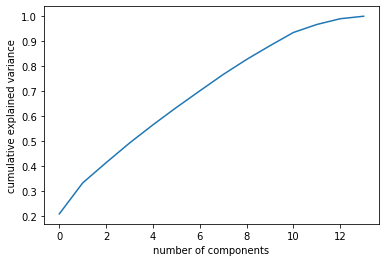

In [ ]:
#Membuat Visualisasi cumulative explained ratio
pca = PCA()
pca_data = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

Terlihat bahwa cumulative explained variance minimal 75% saat n_components minimal 8, berarti sebisa mungkin n_components minimal 8

In [ ]:
# implementasi pca sesuai grafik
n = 9
pca = PCA(n_components=n)
X_new_pca = pca.fit_transform(X_scaled)
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var, '% of total variance is explained by',n, 'principal components')

82.70526081543663 % of total variance is explained by 9 principal components


## LDA
Sama seperti PCA, kita buat visualisasi cumulative explained variance dulu

Text(0, 0.5, 'cumulative explained variance')

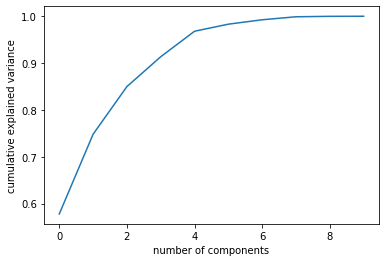

In [ ]:
#Membuat Visualisasi cumulative explained variance
lda = LinearDiscriminantAnalysis()
lda_data = lda.fit_transform(X_scaled, Y)

plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

Terlihat bahwa cumulative explained value minimal 75% saat n_component minimal 1

In [ ]:
# implementasi lda sesuai grafik
l = 4
lda = LinearDiscriminantAnalysis(n_components=l)
X_new_lda = lda.fit_transform(X_scaled, Y)
total_var = lda.explained_variance_ratio_.sum() * 100
print(total_var, '% of total variance is explained by',l, 'features')

91.36003363150664 % of total variance is explained by 4 features


#Buat Model KNN dari data asli dan data yang sudah dilakukan dimensional reduction

In [ ]:
#Training dan Testing data asli dan data dengan feature selection
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 22, stratify=Y)
X_train_a,X_test_a,Y_train_a,Y_test_a = train_test_split(X_new_a, Y, test_size = 0.2, random_state = 22, stratify=Y)
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_new_pca, Y, test_size = 0.2, random_state = 22, stratify=Y)
X_train_lda,X_test_lda,Y_train_lda,Y_test_lda = train_test_split(X_new_lda, Y, test_size = 0.2, random_state = 22, stratify=Y)

In [ ]:
#Train Model and Predict dengan data asli
start = time.time() 
k = 10
knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train,Y_train)
y_predict = knn.predict(X_test)
end = time.time()
print("Akurasi model dengan data asli: ", metrics.accuracy_score(Y_test, y_predict))
print('waktu training hingga prediksi = ', end - start)

Akurasi model dengan data asli:  0.42615319509098604
waktu training hingga prediksi =  0.6604580879211426


In [ ]:
#Train Model and Predict dengan data feature selection
start = time.time() 
k = 10
knn_a = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train_a,Y_train_a)
y_predict_a = knn_a.predict(X_test_a)
end = time.time()
print("Akurasi model dengan data asli: ", metrics.accuracy_score(Y_test_a, y_predict_a))
print('waktu training hingga prediksi = ', end - start)

Akurasi model dengan data asli:  0.4240372407955988
waktu training hingga prediksi =  0.17166399955749512


In [ ]:
#Train Model and Predict dengan data PCA
start = time.time() 
k = 25
knn_pca = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train_pca,Y_train_pca)
y_predict_pca = knn_pca.predict(X_test_pca)
end = time.time()
print("Akurasi model dengan data asli: ", metrics.accuracy_score(Y_test_pca, y_predict_pca))
print('waktu training hingga prediksi = ', end - start)

Akurasi model dengan data asli:  0.42149809564113416
waktu training hingga prediksi =  0.3166499137878418


In [ ]:
#Train Model and Predict dengan data feature selection
start = time.time() 
k = 17
knn_lda = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train_lda,Y_train_lda)
y_predict_lda = knn_lda.predict(X_test_lda)
end = time.time()
print("Akurasi model dengan data asli: ", metrics.accuracy_score(Y_test_lda, y_predict_lda))
print('waktu training hingga prediksi = ', end - start)

Akurasi model dengan data asli:  0.4265763859500635
waktu training hingga prediksi =  0.1102139949798584


Terlihat bahwa dengan jumlah feature yang lebih sedikit, tetap menghasilkan akurasi yang tidak jauh berbeda dan dengan waktu training hingga prediksi yang lebih singkat. Itulah salah 1 keuntungan menggunakan dimensional reduction, ini diperlukan saat menghadapi kasus data berdimensi tinggi (high dimensional data), seperti data genomics, gambar, dll